# Data Science Salaries 2023</br>
Este conjunto de datos es útil para entender la distribución de los salarios en el campo de la ciencia de datos y cómo estos pueden variar en función de factores como la ubicación del empleado y del empleador, el nivel de experiencia, el tipo de empleo, entre otros. Nos permite explorar el impacto del trabajo remoto en los salarios de ciencia de datos y empezar a sacar nuestras propias conclusiones.

## VARIABLES</br>
Nombre de la columna:	Descripción</br>
work_year:	El año en que se pagó el salario.</br>
experience_level:	El nivel de experiencia en el trabajo durante el año.</br>
employment_type:	El tipo de empleo para el rol.</br>
job_title:	El rol desempeñado durante el año.</br>
salary:	El total bruto del salario pagado.</br>
salary_currency:	La moneda del salario pagado como código de moneda ISO 4217.</br>
salaryinusd:	El salario en dólares estadounidenses (USD).</br>
employee_residence:	El principal país de residencia del empleado durante el año de trabajo como código de país ISO 3166.</br>
remote_ratio:	La cantidad total de trabajo realizado a distancia.</br>
company_location:	El país de la oficina principal del empleador o la sucursal contratante.</br>
company_size:	El número mediano de personas que trabajaron para la empresa durante el año.</br>
### Objetivos:</br>
El objetivo principal de este ejercicio es aprender y aplicar técnicas de análisis y visualización de datos utilizando las bibliotecas de Python Matplotlib, Seaborn y Plotly.

Los pasos adecuados para completarlo son:

1: <b>Explorar el conjunto de datos:</b> Comprender la estructura del conjunto de datos, los tipos de variables presentes y cómo estas están distribuidas. <b>Limpiar y preparar el conjunto de datos:</b> Manipular los datos para que sean más accesibles y útiles para el análisis. Esto puede incluir tratar con valores faltantes, convertir tipos de datos y generar nuevas variables a partir de las existentes.

2: <b>Analizar el conjunto de datos:</b> Extraer información útil y significativa del conjunto de datos a través de diversas técnicas de análisis de datos. Visualizar los datos: Crear gráficos y diagramas que ayuden a entender y comunicar los patrones y las relaciones presentes en los datos.

Para responder a las preguntas planteadas se deben usar las siguientes bibliotecas :

Usar <b>Matplotlib</b> para crear gráficos básicos como gráficos de barras, de líneas y de dispersión.</br>
Usar <b>Seaborn</b> para crear gráficos más complejos y atractivos visualmente, aprovechando sus capacidades de integración con pandas.

Importamos librerías necesarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Cargamos nuestro dataset

In [2]:
ds_salaries = pd.read_csv(r"C:\Users\David\Desktop\upgrade_python\temario_bootcamp\Modulo1\06-Visualización de datos\Seaborn\Salaries\dataset\ds_salaries.csv")

In [3]:
ds_salaries.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


¿Cuántas entradas (filas) y variables (columnas) tiene el conjunto de datos?

In [4]:
dimensiones = ds_salaries.shape

print("Número de filas:", dimensiones[0])
print("Número de columnas:",dimensiones[1])

Número de filas: 3755
Número de columnas: 11


¿Qué tipos de datos contiene cada columna?

In [5]:
tipos_datos = ds_salaries.dtypes

print(tipos_datos)

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object


¿Existen valores faltantes en el conjunto de datos?

In [6]:
valores_faltantes = ds_salaries.isna().sum()

print(valores_faltantes)

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


¿Cúal es la distribución que presentan las variables de nuestro dataset?

In [7]:
ds_salaries.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,3755.0,2022.373635,0.691448,2020.0,2022.0,2022.0,2023.0,2023.0
salary,3755.0,190695.571771,671676.500508,6000.0,100000.0,138000.0,180000.0,30400000.0
salary_in_usd,3755.0,137570.389880,63055.625278,5132.0,95000.0,135000.0,175000.0,450000.0
remote_ratio,3755.0,46.271638,48.589050,0.0,0.0,0.0,100.0,100.0


Crea una gráfica para visualizar nuestras variables numéricas


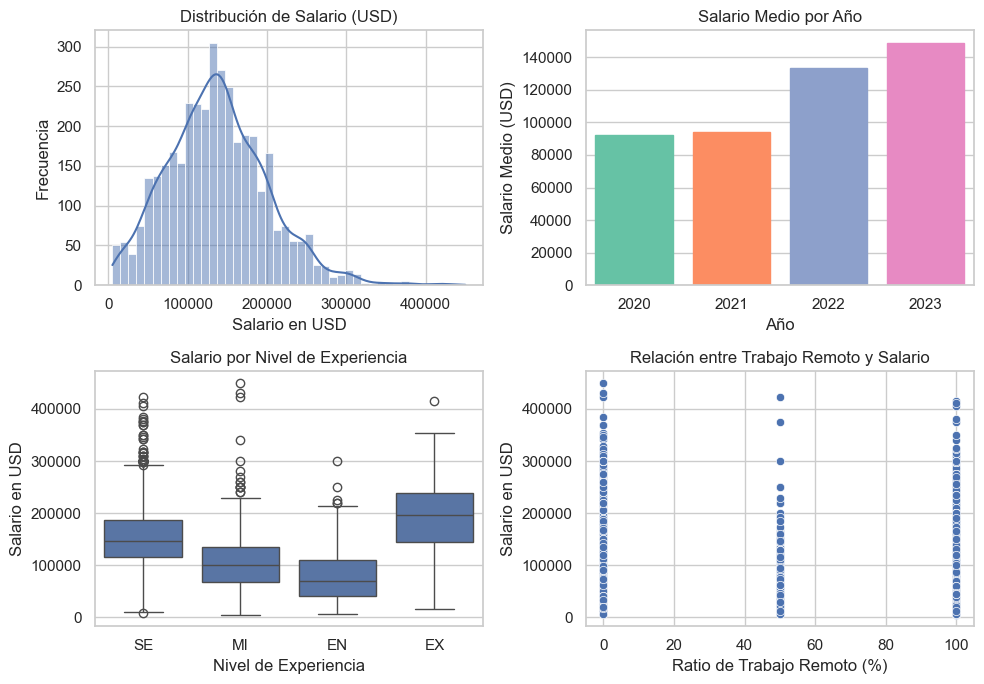

In [8]:
# Estableciendo el estilo de los gráficos
sns.set(style="whitegrid")

# Creando un espacio para múltiples gráficos
fig, axes = plt.subplots(2, 2, figsize=(10, 7))

# Paleta de colores
palette1 = sns.color_palette("Set2")

# Histograma de 'salary_in_usd'
sns.histplot(ds_salaries['salary_in_usd'], ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Distribución de Salario (USD)')
axes[0, 0].set_xlabel('Salario en USD')
axes[0, 0].set_ylabel('Frecuencia')

# Gráfico de barras del salario medio por 'work_year'
mean_salary_by_year = ds_salaries.groupby('work_year')['salary_in_usd'].mean()
bars = sns.barplot(x=mean_salary_by_year.index, y=mean_salary_by_year.values, ax=axes[0, 1])
axes[0, 1].set_title('Salario Medio por Año')
axes[0, 1].set_xlabel('Año')
axes[0, 1].set_ylabel('Salario Medio (USD)')

# Asignando colores de la paleta a cada barra en el gráfico de barras
for i, bar in enumerate(bars.patches):
    bar.set_color(palette1[i % len(palette1)])

# Boxplot de 'salary_in_usd' dividido por 'experience_level'
box = sns.boxplot(x='experience_level', y='salary_in_usd', data=ds_salaries, ax=axes[1, 0])
axes[1, 0].set_title('Salario por Nivel de Experiencia')
axes[1, 0].set_xlabel('Nivel de Experiencia')
axes[1, 0].set_ylabel('Salario en USD')

# Asignando colores de la paleta a cada caja en el boxplot
for i, artist in enumerate(box.artists):
    artist.set_facecolor(palette1[i % len(palette1)])

# Gráfico de dispersión de 'salary_in_usd' contra 'remote_ratio'
sns.scatterplot(x='remote_ratio', y='salary_in_usd', data=ds_salaries, ax=axes[1, 1])
axes[1, 1].set_title('Relación entre Trabajo Remoto y Salario')
axes[1, 1].set_xlabel('Ratio de Trabajo Remoto (%)')
axes[1, 1].set_ylabel('Salario en USD')

plt.tight_layout()

plt.show()



Crea una gráfica para visualizar nuestras variables categóricas

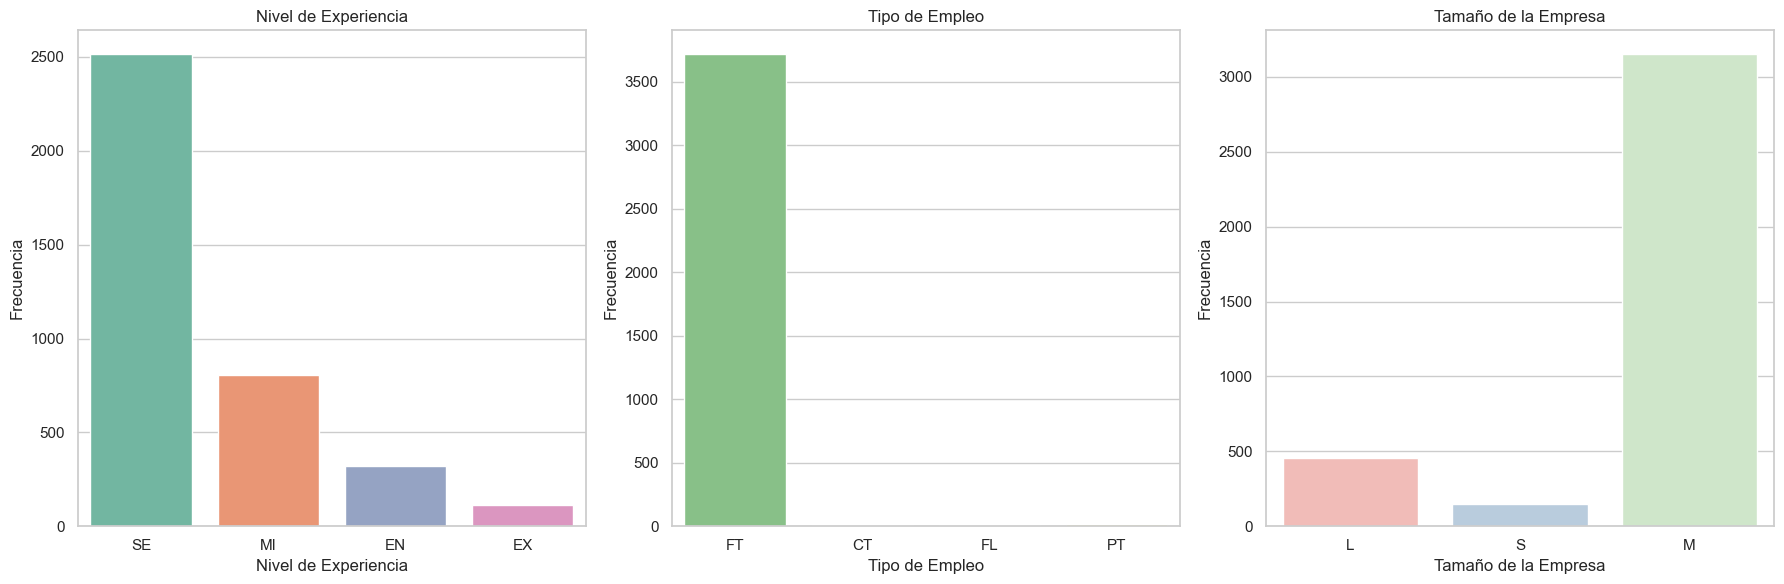

In [9]:

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Paletas de colores
palette1 = "Set2"
palette2 = "Accent"
palette3 = "Pastel1"

# Diagrama de barras para 'experience_level' con paleta de colores 'Set2', ajustado para evitar la advertencia
sns.countplot(x='experience_level', hue='experience_level', data=ds_salaries, palette=palette1, ax=axes[0], legend=False)
axes[0].set_title('Nivel de Experiencia')
axes[0].set_xlabel('Nivel de Experiencia')
axes[0].set_ylabel('Frecuencia')

# Diagrama de barras para 'employment_type' con paleta de colores 'Accent', ajustado para evitar la advertencia
sns.countplot(x='employment_type', hue='employment_type', data=ds_salaries, palette=palette2, ax=axes[1], legend=False)
axes[1].set_title('Tipo de Empleo')
axes[1].set_xlabel('Tipo de Empleo')
axes[1].set_ylabel('Frecuencia')

# Diagrama de barras para 'company_size' con paleta de colores 'Pastel1', ajustado para evitar la advertencia
sns.countplot(x='company_size', hue='company_size', data=ds_salaries, palette=palette3, ax=axes[2], legend=False)
axes[2].set_title('Tamaño de la Empresa')
axes[2].set_xlabel('Tamaño de la Empresa')
axes[2].set_ylabel('Frecuencia')

plt.tight_layout()

plt.show()


Identifica los outliers de nuestro dataset de forma gráfica

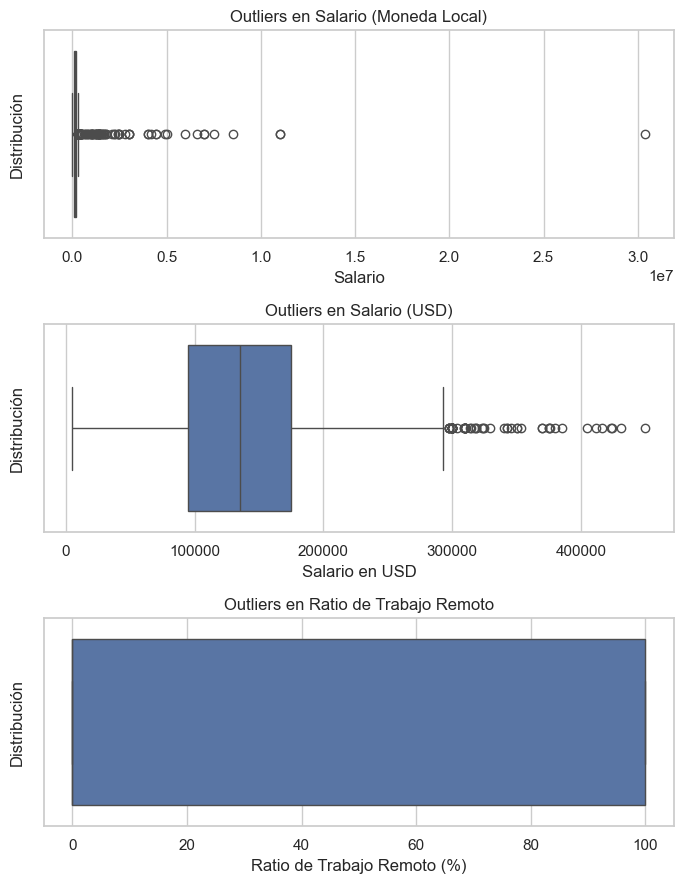

In [10]:
# Creando un espacio para múltiples gráficos para visualizar outliers
fig, axes = plt.subplots(3, 1, figsize=(7, 9))

# Boxplot de 'salary'
sns.boxplot(x='salary', data=ds_salaries, ax=axes[0])
axes[0].set_title('Outliers en Salario (Moneda Local)')
axes[0].set_xlabel('Salario')
axes[0].set_ylabel('Distribución')

# Boxplot de 'salary_in_usd'
sns.boxplot(x='salary_in_usd', data=ds_salaries, ax=axes[1])
axes[1].set_title('Outliers en Salario (USD)')
axes[1].set_xlabel('Salario en USD')
axes[1].set_ylabel('Distribución')

# Boxplot de 'remote_ratio'
sns.boxplot(x='remote_ratio', data=ds_salaries, ax=axes[2])
axes[2].set_title('Outliers en Ratio de Trabajo Remoto')
axes[2].set_xlabel('Ratio de Trabajo Remoto (%)')
axes[2].set_ylabel('Distribución')

plt.tight_layout()

plt.show()



Mas adelante veremos como tratar el tema de los outliers o profundizar por ejemplo en los valores repetidos y sus posibles causas, en este ejercicio damos por hecho que los valores repetidos no son un error de generación de nuestro dataset y que los outliers encontrados son reales, por lo tanto lejos de eliminarlos, nos sirven para realizar mejores análisis de datos sobre nuestras variables en cuestión.

¿Cómo ha cambiado el salario medio con el paso del tiempo (work_year)?

### Segundo paso, la visualización y el análisis de datos de forma gráfica y atractiva:</br>
Una vez que hemos limpiado y preparado nuestros datos, estamos listos para comenzar a explorarlos y visualizarlos. Si no se nos ha proporcionado un objetivo específico para nuestro análisis, es muy útil formular preguntas sobre nuestros datos. Estas preguntas guiarán nuestras visualizaciones y análisis, y nos ayudarán a descubrir patrones, tendencias e información valiosa.

#### Preguntas a resolver usando las librerías de creaciones gráficas vistas en clase:

¿Cuál es el salario promedio por nivel de experiencia?

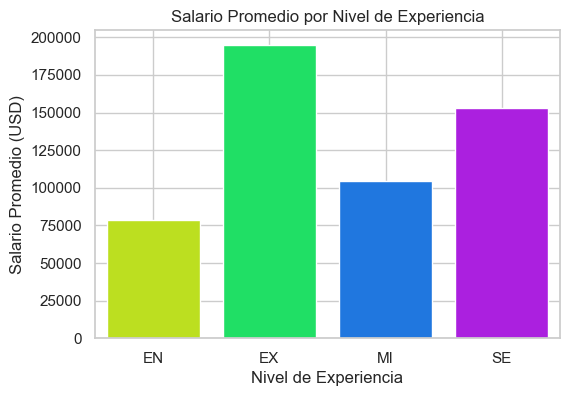

In [11]:
# Calculando el salario promedio por nivel de experiencia
average_salary_by_experience = ds_salaries.groupby('experience_level')['salary_in_usd'].mean()

average_salary_by_experience

import warnings
from seaborn import barplot

# Suprimiendo el FutureWarning específico. Esto lo realizamos así porque aunque nos mostraba bien la gráfica nos aparecía un warning.
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)
    # Creando el gráfico de barras para el salario promedio por nivel de experiencia
    plt.figure(figsize=(6, 4))
    sns.barplot(x=average_salary_by_experience.index, y=average_salary_by_experience.values, palette="hsv")
    plt.title('Salario Promedio por Nivel de Experiencia')
    plt.xlabel('Nivel de Experiencia')
    plt.ylabel('Salario Promedio (USD)')
    plt.grid(True)
    plt.show()



¿Cómo ha cambiado el salario medio con el paso del tiempo (work_year)?

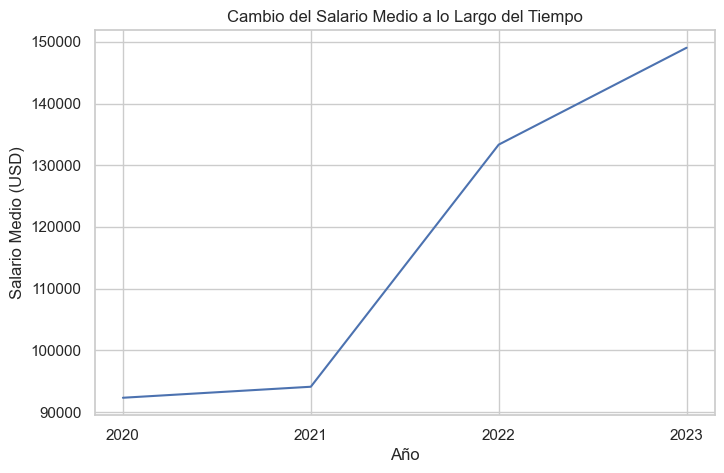

In [12]:
# Calculando el salario medio por año
mean_salary_by_year = ds_salaries.groupby('work_year')['salary_in_usd'].mean()

# Creando el gráfico de líneas
plt.figure(figsize=(8, 5))
sns.lineplot(x=mean_salary_by_year.index, y=mean_salary_by_year.values)
plt.title('Cambio del Salario Medio a lo Largo del Tiempo')
plt.xlabel('Año')
plt.ylabel('Salario Medio (USD)')
plt.xticks(mean_salary_by_year.index)  # Asegurando que todos los años estén en el eje x
plt.grid(True)
plt.show()


¿Cuál es la proporción de trabajo remoto entre diferentes roles de trabajo?



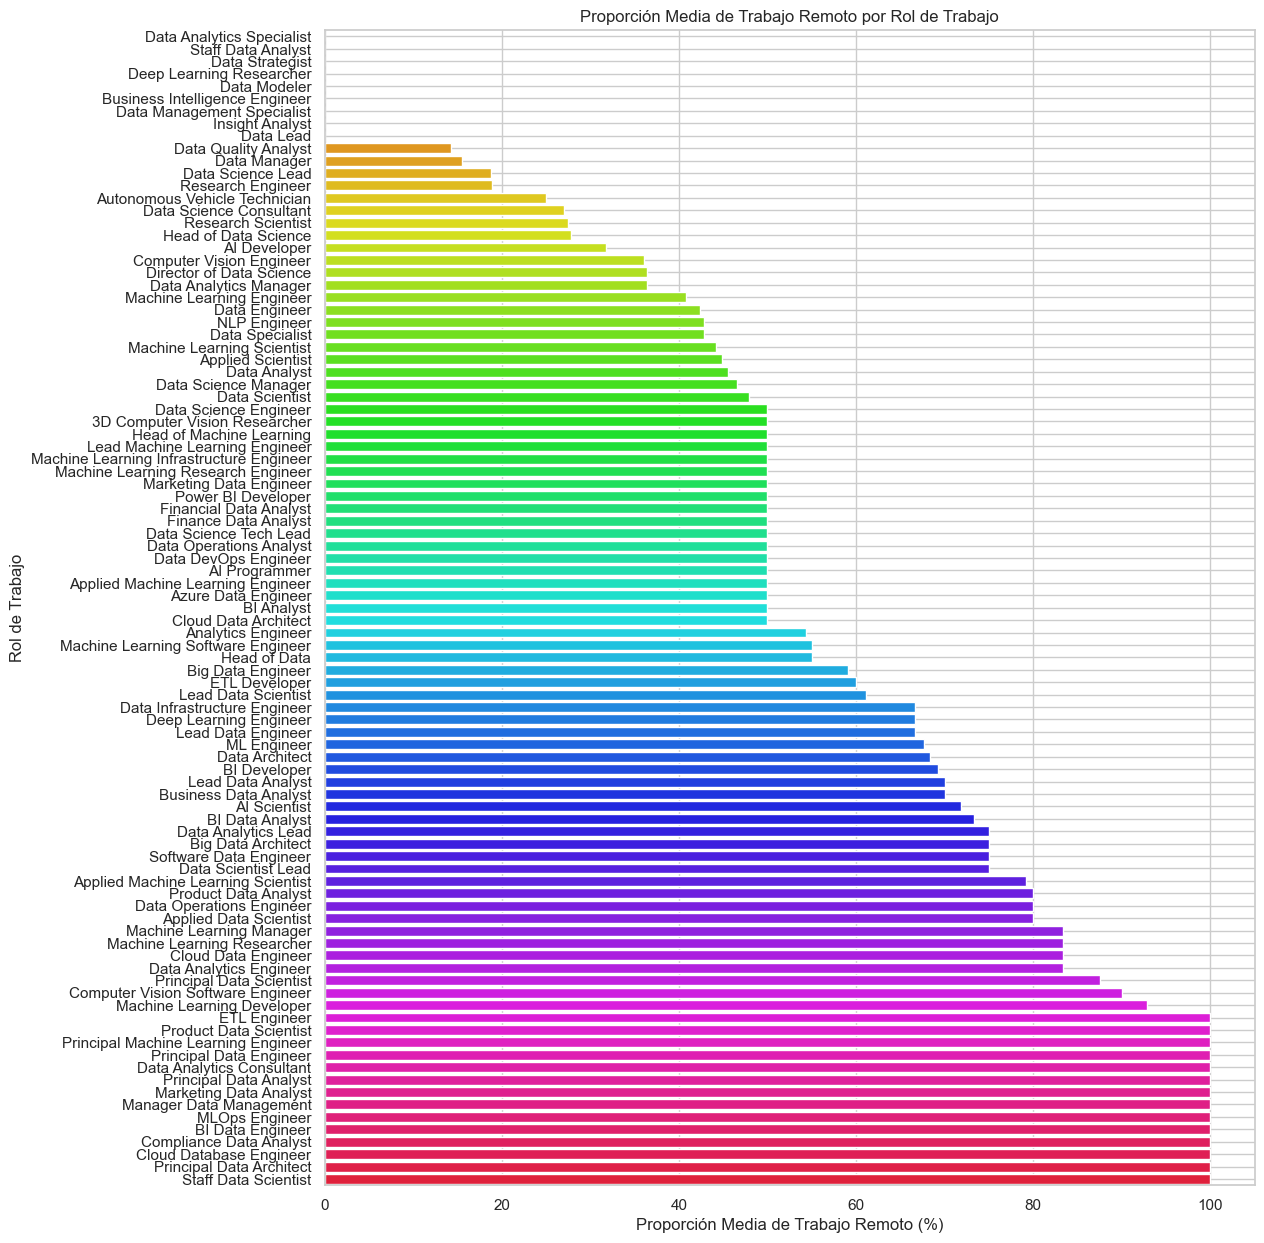

In [13]:
import warnings
from seaborn import barplot

# Suprimiendo el FutureWarning específico. Esto lo realizamos así porque aunque nos mostraba bien la gráfica nos aparecía un warning.
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)

    # Calculando la proporción media de trabajo remoto por rol de trabajo, agrupando y calculando la media.
    mean_remote_by_job = ds_salaries.groupby('job_title')['remote_ratio'].mean()

    # Ordenamos resultados
    mean_remote_by_job_sorted = mean_remote_by_job.sort_values()

    # Paleta "hsv" para hacer el arcoíris
    palettehsv = "hsv"

    plt.figure(figsize=(12, 15))
    barplot(x=mean_remote_by_job_sorted.values, y=mean_remote_by_job_sorted.index, palette=palettehsv)
    plt.title('Proporción Media de Trabajo Remoto por Rol de Trabajo')
    plt.xlabel('Proporción Media de Trabajo Remoto (%)')
    plt.ylabel('Rol de Trabajo')
    plt.grid(True)
    plt.show()


¿Existe una relación entre el tamaño de la empresa y el salario?

In [14]:
# Codificando el tamaño de la empresa en valores numéricos
# Definimos las categorías como: 'S' (pequeño), 'M' (mediano), 'L' (grande)
# Asignamos valores numéricos a estas categorías
size_mapping = {'S': 1, 'M': 2, 'L': 3}
ds_salaries['company_size_num'] = ds_salaries['company_size'].map(size_mapping)

# Calculando la correlación entre 'salary_in_usd' y 'company_size_num'
correlation = ds_salaries[['salary_in_usd', 'company_size_num']].corr()

correlation



,salary_in_usd,company_size_num
salary_in_usd,1.000000,0.000372
company_size_num,0.000372,1.000000


<Axes: >

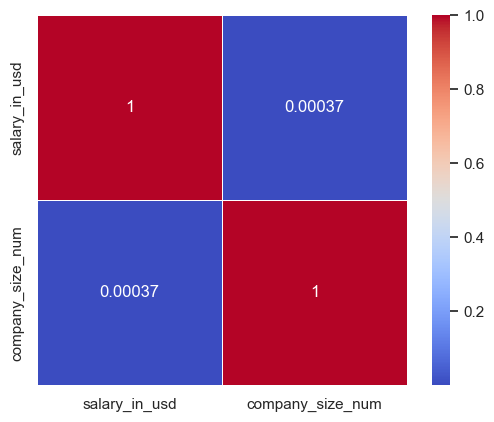

In [15]:
sns.heatmap(correlation, annot=True, linewidths=.5, square=True, cmap='coolwarm')

¿Cuál es el país con más trabajadores remotos?

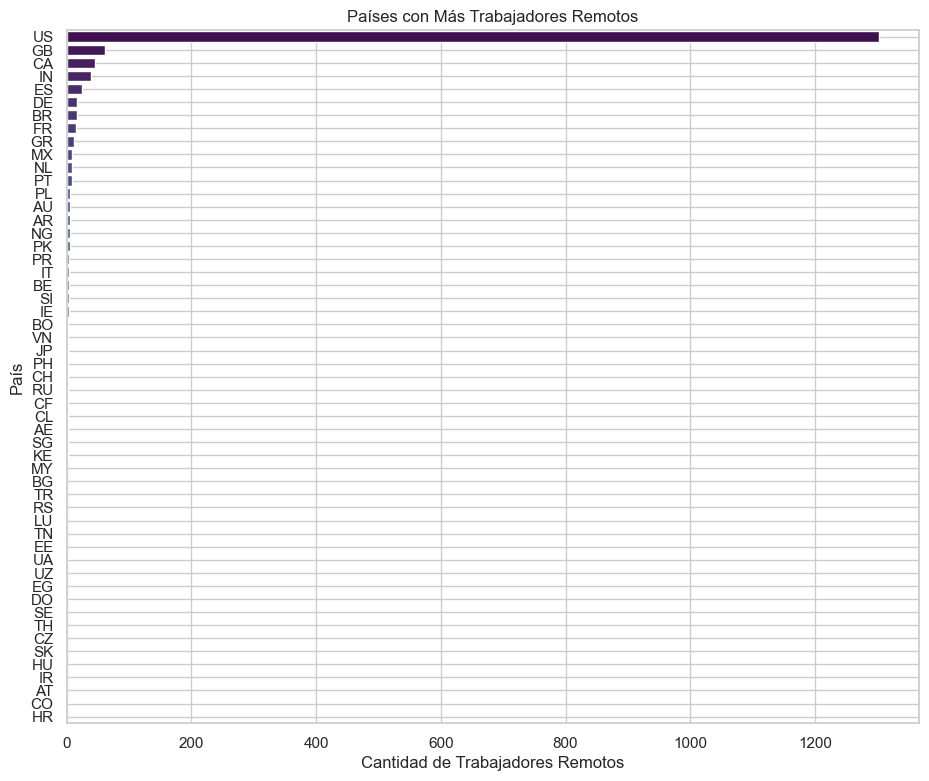

In [16]:
import warnings
from seaborn import barplot

# Suprimiendo el FutureWarning específico. Esto lo realizamos así porque aunque nos mostraba bien la gráfica nos aparecía un warning.
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)

    # Filtrando para trabajadores completamente remotos (remote_ratio = 100)
    remote_workers = ds_salaries[ds_salaries['remote_ratio'] == 100]

    # Contando el número de trabajadores remotos por país
    remote_workers_by_country = remote_workers['employee_residence'].value_counts()

    # Creando el gráfico de barras para los países con más trabajadores remotos
    plt.figure(figsize=(11, 9))
    sns.barplot(x=remote_workers_by_country.values, y=remote_workers_by_country.index, palette="viridis")
    plt.title('Países con Más Trabajadores Remotos')
    plt.xlabel('Cantidad de Trabajadores Remotos')
    plt.ylabel('País')
    plt.grid(True)
    plt.show()



¿Cómo ha cambiado la proporción de trabajo remoto con el paso del tiempo?

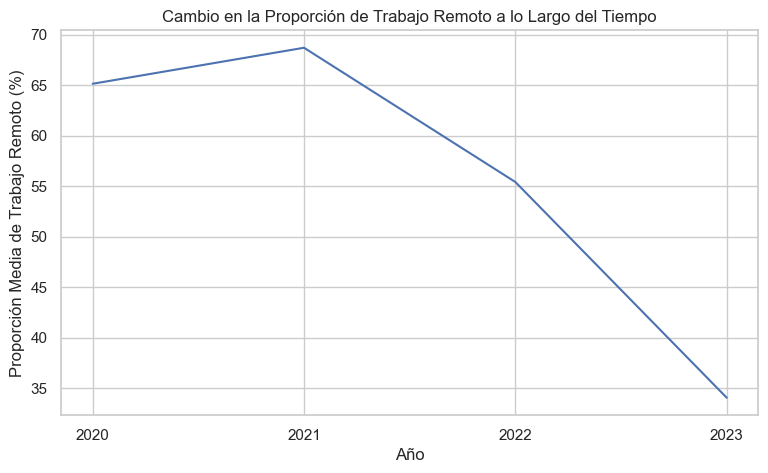

In [17]:
# Calculando la proporción media de trabajo remoto por año
mean_remote_by_year = ds_salaries.groupby('work_year')['remote_ratio'].mean()

# Creando el gráfico de líneas
plt.figure(figsize=(9, 5))
sns.lineplot(x=mean_remote_by_year.index, y=mean_remote_by_year.values)
plt.title('Cambio en la Proporción de Trabajo Remoto a lo Largo del Tiempo')
plt.xlabel('Año')
plt.ylabel('Proporción Media de Trabajo Remoto (%)')
plt.xticks(mean_remote_by_year.index)  # Asegurando que todos los años estén en el eje x
plt.grid(True)
plt.show()



¿Cuál es el país con los salarios promedio más altos en USD?

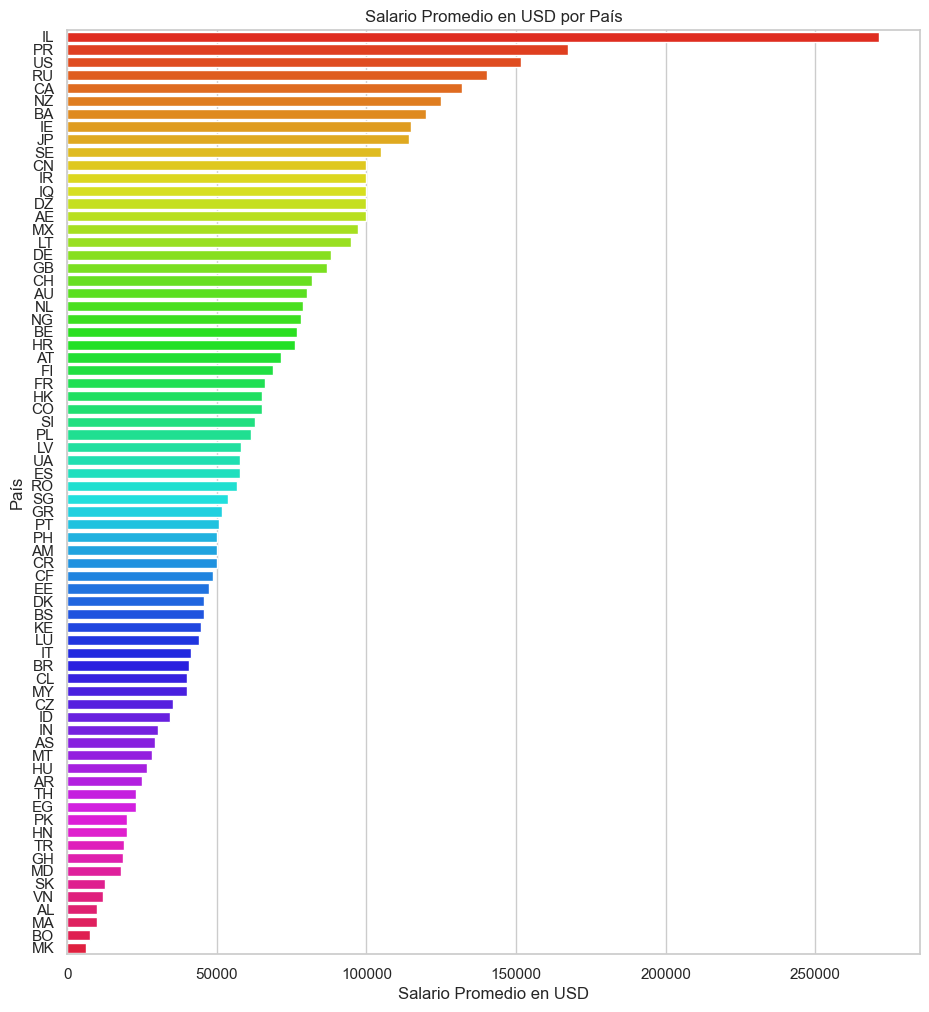

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from seaborn import barplot

# Suprimiendo el FutureWarning específico. Esto lo realizamos así porque aunque nos mostraba bien la gráfica nos aparecía un warning.
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)
    # Calcular el salario promedio en USD por país
    average_salaries_by_country = ds_salaries.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False)

    # Crear una gráfica para visualizar los salarios promedio
    plt.figure(figsize=(11, 12))
    sns.barplot(x=average_salaries_by_country, y=average_salaries_by_country.index, palette="hsv")
    plt.title('Salario Promedio en USD por País')
    plt.xlabel('Salario Promedio en USD')
    plt.ylabel('País')
    plt.show()

    # Mostrar los primeros 5 países con los salarios promedio más altos
    average_salaries_by_country.head()


¿Cómo se distribuyen los roles de trabajo en las diferentes categorías de experiencia?

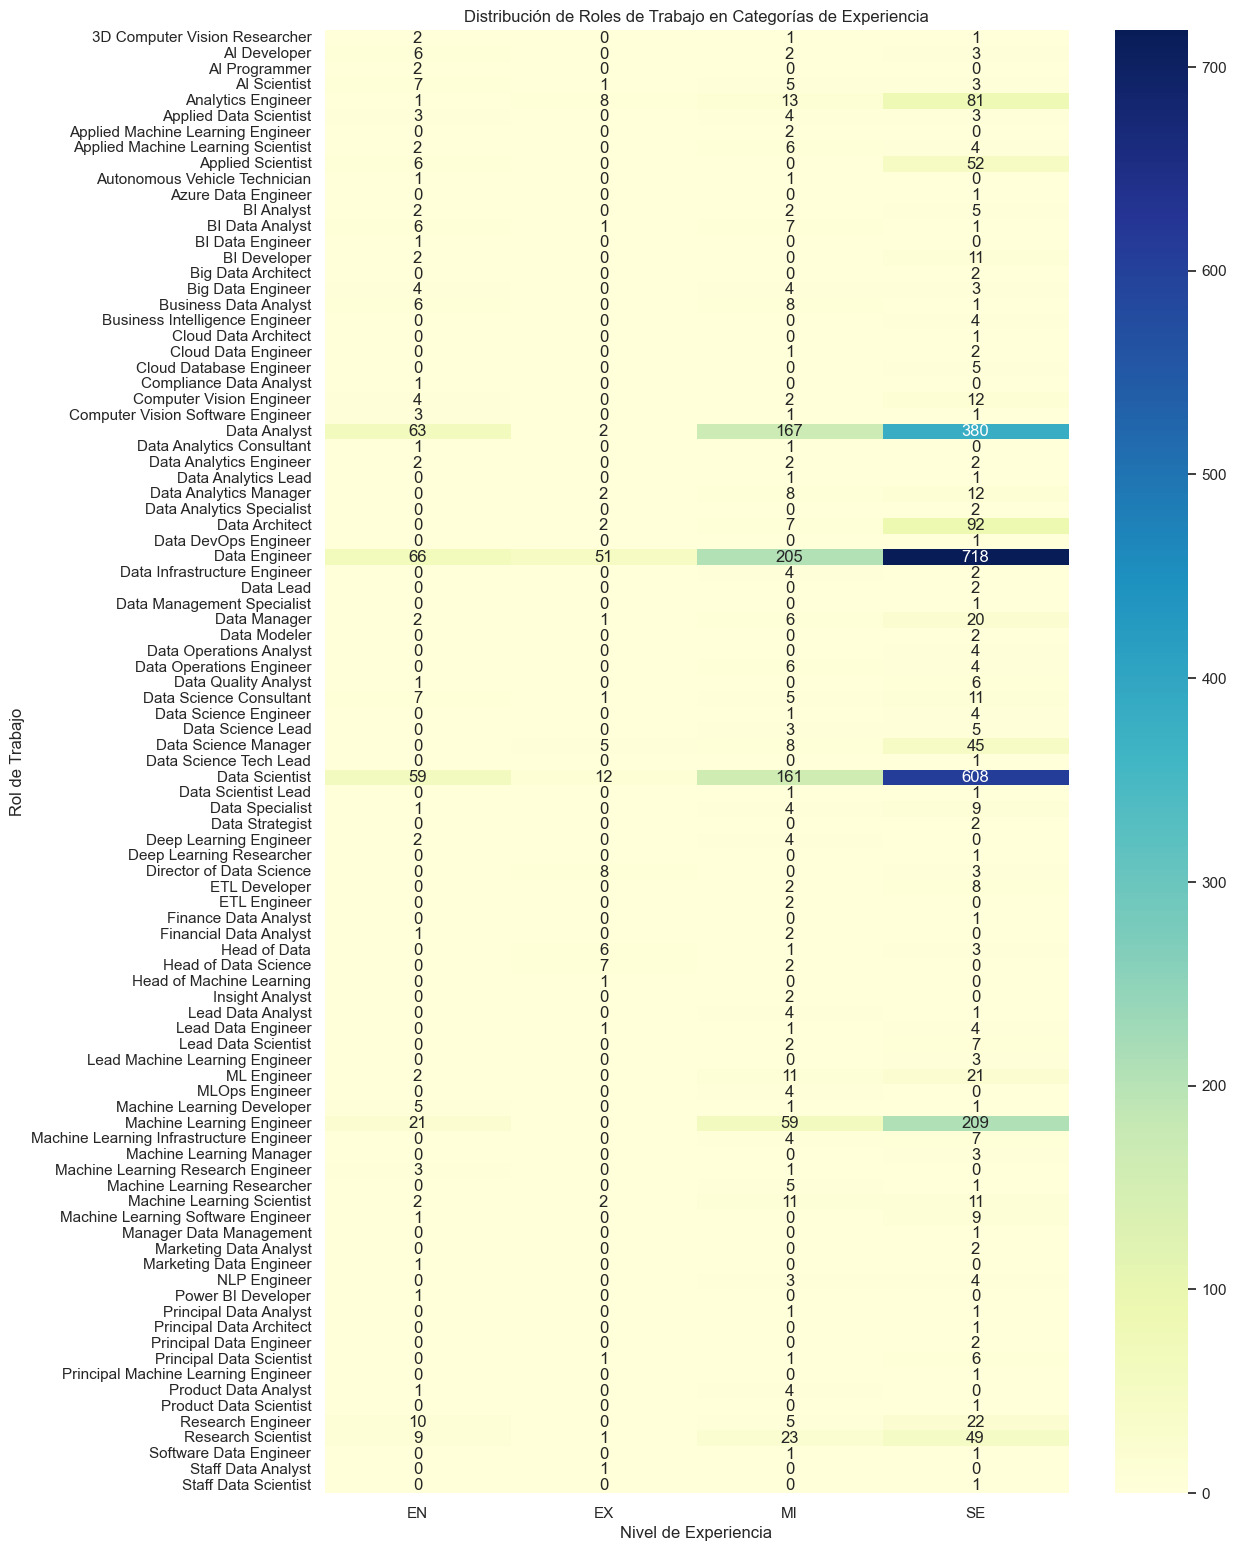

In [19]:
# EN: Entry-level (Nivel de entrada)
# EX: Executive (Nivel ejecutivo)
# MI: Mid-level (Nivel intermedio)
# SE: Senior-level (Nivel senior)

# Crear una tabla de contingencia para ver la distribución de los roles de trabajo en las categorías de experiencia
role_experience_distribution = pd.crosstab(ds_salaries['job_title'], ds_salaries['experience_level'])

# Visualizar la tabla de contingencia
role_experience_distribution.head()

# Crear un gráfico de calor para visualizar la distribución
plt.figure(figsize=(12, 19))
sns.heatmap(role_experience_distribution, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Distribución de Roles de Trabajo en Categorías de Experiencia')
plt.xlabel('Nivel de Experiencia')
plt.ylabel('Rol de Trabajo')
plt.show()




¿Cómo varía el salario promedio entre los diferentes tipos de empleo, fulltime, partime ect?

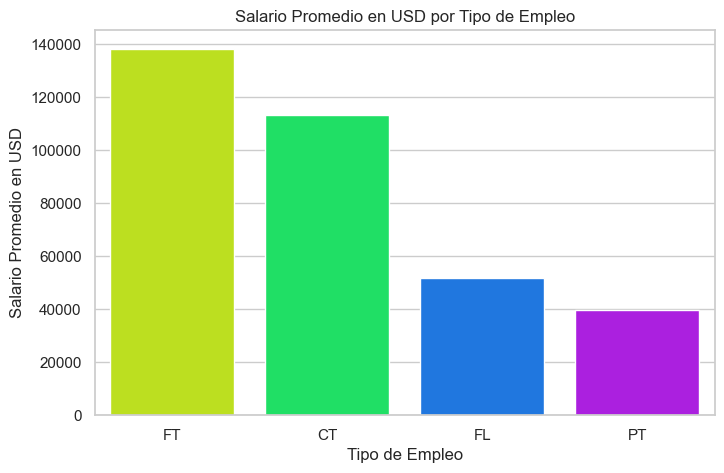

employment_type
FT    138314.199570
CT    113446.900000
FL     51807.800000
PT     39533.705882
Name: salary_in_usd, dtype: float64

In [20]:
# FT: Full-Time (Tiempo completo)
# CT: Contract (Contrato)
# FL: Freelance
# PT: Part-Time (Tiempo parcial)
import warnings
from seaborn import barplot

# Suprimiendo el FutureWarning específico. Esto lo realizamos así porque aunque nos mostraba bien la gráfica nos aparecía un warning.
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)

    # Agrupar los datos por tipo de empleo y calcular el salario promedio
    average_salary_by_employment_type = ds_salaries.groupby('employment_type')['salary_in_usd'].mean().sort_values(ascending=False)

    # Crear una gráfica para visualizar las diferencias
    plt.figure(figsize=(8, 5))
    sns.barplot(x=average_salary_by_employment_type.index, y=average_salary_by_employment_type, palette="hsv")
    plt.title('Salario Promedio en USD por Tipo de Empleo')
    plt.xlabel('Tipo de Empleo')
    plt.ylabel('Salario Promedio en USD')
    plt.show()

average_salary_by_employment_type



Crear un top10 con los empleos mas demandados:

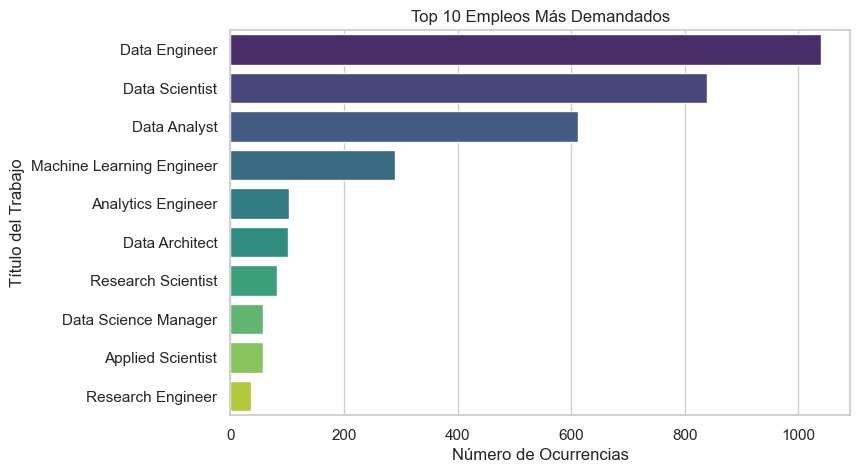

job_title
Data Engineer                1040
Data Scientist                840
Data Analyst                  612
Machine Learning Engineer     289
Analytics Engineer            103
Data Architect                101
Research Scientist             82
Data Science Manager           58
Applied Scientist              58
Research Engineer              37
Name: count, dtype: int64

In [21]:
import warnings
from seaborn import barplot

# Suprimiendo el FutureWarning específico. Esto lo realizamos así porque aunque nos mostraba bien la gráfica nos aparecía un warning.
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)

    # Contar la frecuencia de cada título de trabajo y seleccionar los 10 más comunes
    top_10_demanded_jobs = ds_salaries['job_title'].value_counts().head(10)

    # Crear una gráfica para visualizar el top 10 de los empleos más demandados
    plt.figure(figsize=(8, 5))
    sns.barplot(x=top_10_demanded_jobs, y=top_10_demanded_jobs.index, palette="viridis")
    plt.title('Top 10 Empleos Más Demandados')
    plt.xlabel('Número de Ocurrencias')
    plt.ylabel('Título del Trabajo')
    plt.show()

top_10_demanded_jobs

Crear un top10 con los empleos mas cotizados:

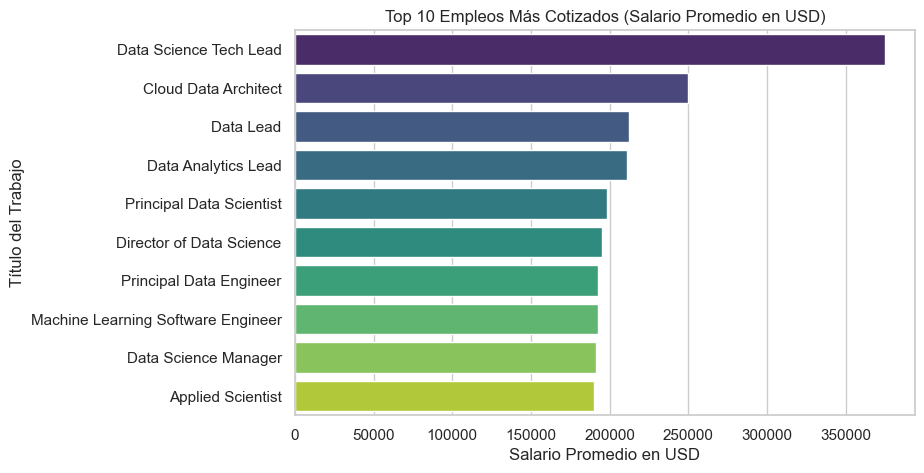

job_title
Data Science Tech Lead                375000.000000
Cloud Data Architect                  250000.000000
Data Lead                             212500.000000
Data Analytics Lead                   211254.500000
Principal Data Scientist              198171.125000
Director of Data Science              195140.727273
Principal Data Engineer               192500.000000
Machine Learning Software Engineer    192420.000000
Data Science Manager                  191278.775862
Applied Scientist                     190264.482759
Name: salary_in_usd, dtype: float64

In [22]:
import warnings
from seaborn import barplot

# Suprimiendo el FutureWarning específico. Esto lo realizamos así porque aunque nos mostraba bien la gráfica nos aparecía un warning.
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)

    # Calcular el salario promedio para cada título de trabajo y seleccionar los 10 con el salario promedio más alto
    top_10_highest_paid_jobs = ds_salaries.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).head(10)

    # Crear una gráfica para visualizar el top 10 de los empleos con el salario promedio más alto
    plt.figure(figsize=(8, 5))
    sns.barplot(x=top_10_highest_paid_jobs, y=top_10_highest_paid_jobs.index, palette="viridis")
    plt.title('Top 10 Empleos Más Cotizados (Salario Promedio en USD)')
    plt.xlabel('Salario Promedio en USD')
    plt.ylabel('Título del Trabajo')
    plt.show()

top_10_highest_paid_jobs


Crear un top10 con empleos donde podemos trabajar remoto:

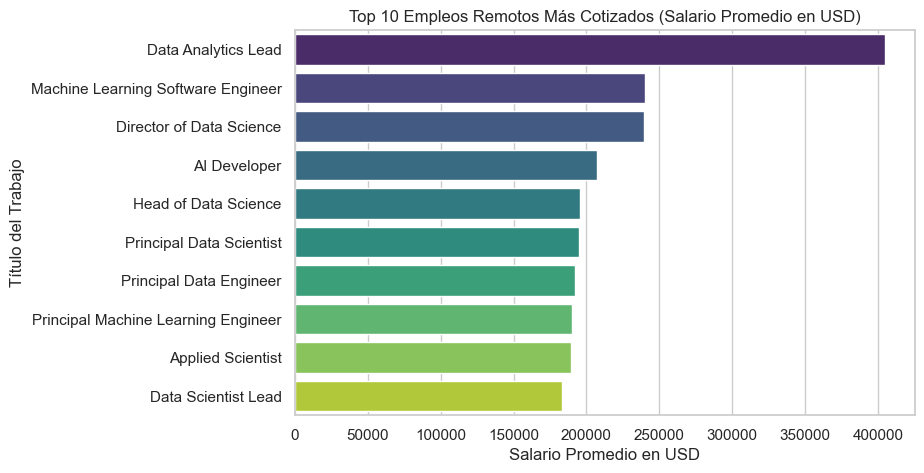

In [25]:
import warnings
from seaborn import barplot

# Suprimiendo el FutureWarning específico. Esto lo realizamos así porque aunque nos mostraba bien la gráfica nos aparecía un warning.
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)

    # Filtrar el dataset para incluir solo empleos con posibilidad de trabajo remoto
    remote_jobs = ds_salaries[ds_salaries['remote_ratio'] == 100]

    # Calcular el salario promedio para cada título de trabajo en trabajos remotos y seleccionar los 10 más altos
    top_10_remote_jobs = remote_jobs.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).head(10)

    # Crear una gráfica para visualizar el top 10 de empleos remotos con el salario promedio más alto
    plt.figure(figsize=(8, 5))
    sns.barplot(x=top_10_remote_jobs, y=top_10_remote_jobs.index, palette="viridis")
    plt.title('Top 10 Empleos Remotos Más Cotizados (Salario Promedio en USD)')
    plt.xlabel('Salario Promedio en USD')
    plt.ylabel('Título del Trabajo')
    plt.show()

    top_10_remote_jobs
